### Goal of this research:
### Enzymes are a type of protein. Based on the dataset, how well is the performance on KNN, SVM and Decision Tree machine learning algorithms for predicting enzymes classification names using only the amino acid sequence feature? 

### How well can the performance be improved adding features like temperature and pH(Hydrogen Ion Concentration) for the prediction?

### The target for our classifers are the 6 major types of enzymes: TRANSFERASE, OXIDOREDUCTASE, HYDROLASE, LYASE, ISOMERASE and, LIGASE.


### Lets Import necessary libraries

In [1]:
import os
import glob as gl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import SMOTE


Lets created a list with the path and name of the .csv files to concatenate

In [2]:
path = r'C:\..\Projects\ml-enzyme-classification\proteins'
rcsb_pdb_custom_report_enzymes= gl.glob(os.path.join(path, "*.csv"))



Lets created a dataframe from each .csv file and then concatenate them in one final df

In [3]:
df_nfiles= (pd.read_csv(f) for f in rcsb_pdb_custom_report_enzymes)
data_pdb = pd.concat(df_nfiles, ignore_index=True)

### Lets do initial exploration 

In [4]:
data_pdb.shape

(332556, 22)

In [5]:
data_pdb.iloc[:,0:12].head()

,Entry ID,Experimental Method,Matthews Coefficient,Percent Solvent Content,Crystallization Method,pH,Temp (K),PDB ID,Total Number of Polymer Residues per Deposited Model,Molecular Weight per Deposited Model,Resolution (Å),Entry Polymer Types
0,4JS2,X-RAY DIFFRACTION,2.58,52.33,"VAPOR DIFFUSION, SITTING DROP",7.0,294.0,4JS2,318.0,38.93,2.3,Protein/Oligosaccharide
1,4K3Q,X-RAY DIFFRACTION,2.43,49.45,"VAPOR DIFFUSION, HANGING DROP",6.5,285.0,4K3Q,738.0,83.44,1.85,Protein (only)
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4K42,X-RAY DIFFRACTION,2.28,46.10,"VAPOR DIFFUSION, SITTING DROP",5.5,298.0,4K42,1500.0,171.63,2.9,Protein (only)
4,4JRR,X-RAY DIFFRACTION,2.30,46.54,"VAPOR DIFFUSION, HANGING DROP",8.0,289.0,4JRR,567.0,65.05,1.88,Protein (only)


In [6]:
data_pdb.iloc[:,12:].head()

,Publication Year,Stucture Keywords,Sequence,Entity Polymer Type,Chain Length,Source Organism,Entity ID,Entry Id (Polymer Entity Identifiers),Database Name,Unnamed: 21
0,2013.0,TRANSFERASE,PEASFQVWNKDSSSKNLIPRLQKIWKNYLSMNKYKVSYKGPGPGIK...,Protein,318.0,Homo sapiens,1.0,4JS2,UniProt,NaN
1,2013.0,TRANSFERASE,MKFTVEREHLLKPLQQVSGPLGGRPTLPILGNLLLQVADGTLSLTG...,Protein,366.0,Escherichia coli K-12,1.0,4K3Q,UniProt,NaN
2,NaN,NaN,XQLDAF,Protein,6.0,NaN,2.0,4K3Q,NaN,NaN
3,2014.0,CONTRACTILE PROTEIN,DEDETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVMVG...,Protein,375.0,Oryctolagus cuniculus,1.0,4K42,UniProt,NaN
4,NaN,OXIDOREDUCTASE,GSHMQFIEGKDYQTVASAQLSTNKDKTPLITEFFSYGCPWCYKIDA...,Protein,189.0,Legionella pneumophila subsp. pneumophila str....,1.0,4JRR,UniProt,NaN


### Lets check the columns

In [7]:
data_pdb.columns

Index(['Entry ID', 'Experimental Method', 'Matthews Coefficient',
       'Percent Solvent Content', 'Crystallization Method', 'pH', 'Temp (K)',
       'PDB ID', 'Total Number of Polymer Residues per Deposited Model',
       'Molecular Weight per Deposited Model', 'Resolution (Å)',
       'Entry Polymer Types', 'Publication Year', 'Stucture Keywords',
       'Sequence', 'Entity Polymer Type', 'Chain Length', 'Source Organism',
       'Entity ID', 'Entry Id (Polymer Entity Identifiers)', 'Database Name',
       'Unnamed: 21'],
      dtype='object')

## We see that the column 'Stucture Keywords' has the information about the protein classification name that we need for our research as a target for our classifier.
Lets check how many types we have



In [8]:
len ( data_pdb['Stucture Keywords'].unique())

4687

In [9]:
data_pdb['Stucture Keywords'][:10]

0            TRANSFERASE
1            TRANSFERASE
2                    NaN
3    CONTRACTILE PROTEIN
4         OXIDOREDUCTASE
5         OXIDOREDUCTASE
6            TRANSFERASE
7                    NaN
8    CONTRACTILE PROTEIN
9          HYDROLASE/DNA
Name: Stucture Keywords, dtype: object

## Lets start with our cleaning process

Lets deleted the columm "Unnamed:21"

In [10]:
del data_pdb['Unnamed: 21']

### Lets check for nulls

In [11]:
data_pdb.isnull().sum()

Entry ID                                                157650
Experimental Method                                     157481
Matthews Coefficient                                    173360
Percent Solvent Content                                 173334
Crystallization Method                                  199511
pH                                                      204745
Temp (K)                                                199261
PDB ID                                                  157650
Total Number of Polymer Residues per Deposited Model    157650
Molecular Weight per Deposited Model                    157650
Resolution (Å)                                          165541
Entry Polymer Types                                     157650
Publication Year                                        186425
Stucture Keywords                                       157653
Sequence                                                  8231
Entity Polymer Type                                    

In [12]:
data_pdb[~data_pdb.isnull().any(axis=1)].shape

(79535, 21)

We have nulls in all the columns , 79535 rows are clean with no NaNs.  We don't need many columns for our research, so lets first make a subset with the features that we need and then we'll drop the NaN values.

In [13]:
features=['Entry ID', 'pH','Temp (K)','Entity Polymer Type','Stucture Keywords','Sequence','Chain Length']

In [14]:
data_pdb_search=data_pdb[features].copy()

In [15]:
data_pdb_search.head()

,Entry ID,pH,Temp (K),Entity Polymer Type,Stucture Keywords,Sequence,Chain Length
0,4JS2,7.0,294.0,Protein,TRANSFERASE,PEASFQVWNKDSSSKNLIPRLQKIWKNYLSMNKYKVSYKGPGPGIK...,318.0
1,4K3Q,6.5,285.0,Protein,TRANSFERASE,MKFTVEREHLLKPLQQVSGPLGGRPTLPILGNLLLQVADGTLSLTG...,366.0
2,NaN,NaN,NaN,Protein,NaN,XQLDAF,6.0
3,4K42,5.5,298.0,Protein,CONTRACTILE PROTEIN,DEDETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVMVG...,375.0
4,4JRR,8.0,289.0,Protein,OXIDOREDUCTASE,GSHMQFIEGKDYQTVASAQLSTNKDKTPLITEFFSYGCPWCYKIDA...,189.0


In [16]:
data_pdb_search.isnull().sum()

Entry ID               157650
pH                     204745
Temp (K)               199261
Entity Polymer Type      8231
Stucture Keywords      157653
Sequence                 8231
Chain Length             8231
dtype: int64

In [17]:
data_pdb[~data_pdb_search.isnull().any(axis=1)].shape

(110503, 21)

In this subset we have 110503 clean rows, so lets clean the dataframe.

### Cleaning NaN Values

In [18]:
before_rows = data_pdb.shape[0]
print(before_rows)

332556


In [19]:
data_pdb_search=data_pdb_search.dropna()

In [20]:
after_rows= data_pdb_search.shape[0]
print(after_rows)

110503


In [21]:
print("Number of rows deleted with NaN Values =", (before_rows-after_rows))

Number of rows deleted with NaN Values = 222053


### Let's sure the columns 'Sequence','Entity Polimer Type' and 'Stucture Keywords' are string with uppercases.  

In [22]:
data_pdb_search['Sequence']=data_pdb_search['Sequence'].str.upper()

In [23]:
data_pdb_search['Stucture Keywords']=data_pdb_search['Stucture Keywords'].str.upper()

In [24]:
data_pdb_search['Entyty Polymer Type']=data_pdb_search['Entity Polymer Type'].str.upper()

In [25]:
data_pdb_search.shape

(110503, 8)

### Lets delete rows with duplicate values in columns :'Sequence' and 'Stucture Keywords'

In [26]:
data_pdb_search.drop_duplicates(['Entry ID'],keep='first',inplace=True)

In [27]:
data_pdb_search.shape

(92443, 8)

In [28]:
data_pdb_search.drop_duplicates(['Sequence'],keep='first',inplace=True)

In [29]:
data_pdb_search.shape

(51624, 8)

In [30]:
data_pdb_search.head()

,Entry ID,pH,Temp (K),Entity Polymer Type,Stucture Keywords,Sequence,Chain Length,Entyty Polymer Type
0,4JS2,7.0,294.0,Protein,TRANSFERASE,PEASFQVWNKDSSSKNLIPRLQKIWKNYLSMNKYKVSYKGPGPGIK...,318.0,PROTEIN
1,4K3Q,6.5,285.0,Protein,TRANSFERASE,MKFTVEREHLLKPLQQVSGPLGGRPTLPILGNLLLQVADGTLSLTG...,366.0,PROTEIN
3,4K42,5.5,298.0,Protein,CONTRACTILE PROTEIN,DEDETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVMVG...,375.0,PROTEIN
4,4JRR,8.0,289.0,Protein,OXIDOREDUCTASE,GSHMQFIEGKDYQTVASAQLSTNKDKTPLITEFFSYGCPWCYKIDA...,189.0,PROTEIN
5,4JS3,4.8,293.0,Protein,OXIDOREDUCTASE,MGHHHHHHHHHHSSGHIDDDDKHMATGDERFYAEHLMPTLQGLLDP...,390.0,PROTEIN


In [31]:
data_pdb_search['Stucture Keywords'].value_counts()[:20]

HYDROLASE                                7892
TRANSFERASE                              6027
OXIDOREDUCTASE                           4773
IMMUNE SYSTEM                            2071
LYASE                                    1833
TRANSPORT PROTEIN                        1359
SIGNALING PROTEIN                        1316
STRUCTURAL GENOMICS, UNKNOWN FUNCTION    1299
TRANSCRIPTION                            1287
ISOMERASE                                1151
VIRAL PROTEIN                            1046
LIGASE                                    956
PROTEIN BINDING                           911
MEMBRANE PROTEIN                          751
HYDROLASE/HYDROLASE INHIBITOR             740
UNKNOWN FUNCTION                          688
CELL ADHESION                             672
TRANSFERASE/TRANSFERASE INHIBITOR         630
DNA BINDING PROTEIN                       616
STRUCTURAL PROTEIN                        548
Name: Stucture Keywords, dtype: int64

### Lets filter the column "Stucture Keywords" to choose the proteins that are classified as a type of enzyme (TRANSFERASE, OXIDOREDUCTASE, HYDROLASE, LYASE, ISOMERASE, LIGASE)
### Note: We are not going to classifed DNA/RNA ENZYMES.

In [32]:
enzyme_type=['TRANSFERASE', 'OXIDOREDUCTASE', 'HYDROLASE', 'LYASE', 'ISOMERASE', 'LIGASE',]

In [33]:
data_pdb_search['Stucture Keywords'].isin(enzyme_type)

0          True
1          True
3         False
4          True
5          True
          ...  
332245    False
332246    False
332380     True
332434    False
332501     True
Name: Stucture Keywords, Length: 51624, dtype: bool

In [34]:
data_pdb_search=data_pdb_search[data_pdb_search['Stucture Keywords'].isin(enzyme_type)].copy()

In [35]:
data_pdb_search

,Entry ID,pH,Temp (K),Entity Polymer Type,Stucture Keywords,Sequence,Chain Length,Entyty Polymer Type
0,4JS2,7.0,294.00,Protein,TRANSFERASE,PEASFQVWNKDSSSKNLIPRLQKIWKNYLSMNKYKVSYKGPGPGIK...,318.0,PROTEIN
1,4K3Q,6.5,285.00,Protein,TRANSFERASE,MKFTVEREHLLKPLQQVSGPLGGRPTLPILGNLLLQVADGTLSLTG...,366.0,PROTEIN
4,4JRR,8.0,289.00,Protein,OXIDOREDUCTASE,GSHMQFIEGKDYQTVASAQLSTNKDKTPLITEFFSYGCPWCYKIDA...,189.0,PROTEIN
5,4JS3,4.8,293.00,Protein,OXIDOREDUCTASE,MGHHHHHHHHHHSSGHIDDDDKHMATGDERFYAEHLMPTLQGLLDP...,390.0,PROTEIN
12,4K44,5.5,277.00,Protein,HYDROLASE,SQAESKEWYHASLTRAQAEHMLMRVPRDGAFLVRKRNEPNSYAISF...,106.0,PROTEIN
...,...,...,...,...,...,...,...,...
332227,6S8O,7.0,291.15,Protein,HYDROLASE,GAEFMDLDQGGEALAPRQVLDLEDLVFTQGSHFMANKRCQLPDGSF...,1747.0,PROTEIN
332228,6S90,8.5,298.00,Protein,TRANSFERASE,GSWEIDPKDLTFLKELGTGQFGVVKYGKWRGQYDVAIKMIKEGSMS...,266.0,PROTEIN
332237,6S8Q,8.0,291.15,Protein,HYDROLASE,GAEFMDLDQGGEALAPRQVLDLEDLVFTQGSHFMANKRCQLPDGSF...,1747.0,PROTEIN
332380,6S9U,7.5,291.00,Protein,TRANSFERASE,MTHAGMKASLPNRVMLNAYPDSIDGDLAGTVRMLQRPEFTDAFGLF...,531.0,PROTEIN


In [36]:
data_pdb_search['Stucture Keywords'].value_counts()

HYDROLASE         7892
TRANSFERASE       6027
OXIDOREDUCTASE    4773
LYASE             1833
ISOMERASE         1151
LIGASE             956
Name: Stucture Keywords, dtype: int64

In [289]:
listtype=data_pdb_search['Stucture Keywords'].copy()

In [290]:
sorted(listtype)

['HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDROLASE',
 'HYDR

Text(0, 0.5, 'Count')

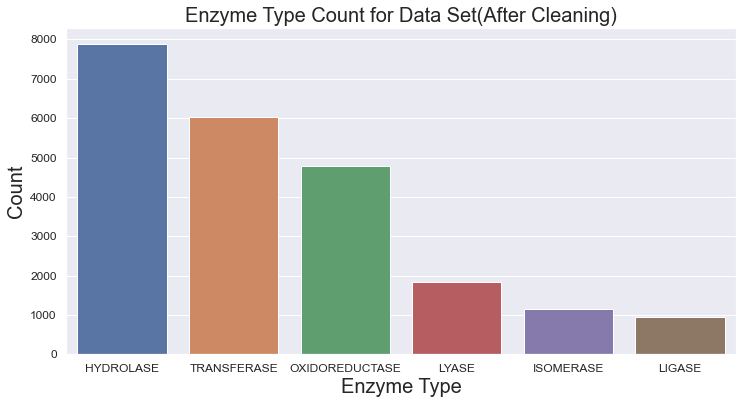

In [293]:
%matplotlib inline
fig, axis= plt.subplots(figsize=(12,6))
axis.tick_params(which='major',labelsize=12)
axis.set_title('Enzyme Type Count for Data Set(After Cleaning)',fontsize=20)
axis.set_ylabel('Count',fontsize=20)
axis.set_xlabel('Enzyme Type',fontsize=20)
sns.countplot(x='Stucture Keywords', data=data_pdb_search, order=['HYDROLASE','TRANSFERASE','OXIDOREDUCTASE','LYASE','ISOMERASE','LIGASE'])
#sns.countplot(x='Stucture Keywords', data=listtype)
axis.set_xlabel('Enzyme Type',fontsize=20)
axis.set_ylabel('Count',fontsize=20)

Text(0.5, 0, 'Temp')

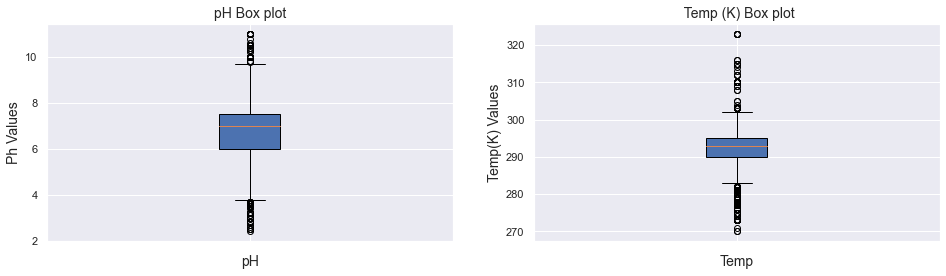

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
axes[0].boxplot(data_pdb_search['pH'],vert=True,patch_artist=True)
axes[1].boxplot(data_pdb_search["Temp (K)"],vert=True,patch_artist=True)
axes[0].set_title('pH Box plot',fontsize=14)
axes[1].set_title(' Temp (K) Box plot',fontsize=14)
axes[0].set_ylabel('Ph Values',fontsize=14)
axes[1].set_ylabel('Temp(K) Values',fontsize=14)
axes[0].set_xticklabels('')
axes[1].set_xticklabels('')
axes[0].set_xlabel('pH',fontsize=14)
axes[1].set_xlabel('Temp',fontsize=14)

### Lets add new columns, one for each Amino acid and calculate percentage of each Amino Acid for each Entry Id(enzyme) and  put the result in these columns. Now we know the Amino Acid Composition for each sequence.

In [39]:
data_pdb_search.reset_index(drop=True,inplace=True)

In [40]:
len(data_pdb_search)

22632

In [41]:
data_pdb_search.index

RangeIndex(start=0, stop=22632, step=1)

In [42]:
Amino_Acids=['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V']

In [43]:
for x in Amino_Acids:
    data_pdb_search[x]=data_pdb_search['Sequence'].str.count(x)/data_pdb_search['Sequence'].str.len()


In [44]:
data_pdb_search.head(5)

,Entry ID,pH,Temp (K),Entity Polymer Type,Stucture Keywords,Sequence,Chain Length,Entyty Polymer Type,A,R,...,L,K,M,F,P,S,T,W,Y,V
0,4JS2,7.0,294.0,Protein,TRANSFERASE,PEASFQVWNKDSSSKNLIPRLQKIWKNYLSMNKYKVSYKGPGPGIK...,318.0,PROTEIN,0.037736,0.037736,...,0.088050,0.075472,0.025157,0.044025,0.069182,0.075472,0.050314,0.025157,0.056604,0.050314
1,4K3Q,6.5,285.0,Protein,TRANSFERASE,MKFTVEREHLLKPLQQVSGPLGGRPTLPILGNLLLQVADGTLSLTG...,366.0,PROTEIN,0.076503,0.068306,...,0.117486,0.032787,0.040984,0.038251,0.054645,0.062842,0.049180,0.002732,0.019126,0.084699
2,4JRR,8.0,289.0,Protein,OXIDOREDUCTASE,GSHMQFIEGKDYQTVASAQLSTNKDKTPLITEFFSYGCPWCYKIDA...,189.0,PROTEIN,0.100529,0.031746,...,0.068783,0.084656,0.047619,0.052910,0.047619,0.063492,0.052910,0.015873,0.047619,0.063492
3,4JS3,4.8,293.0,Protein,OXIDOREDUCTASE,MGHHHHHHHHHHSSGHIDDDDKHMATGDERFYAEHLMPTLQGLLDP...,390.0,PROTEIN,0.076923,0.079487,...,0.115385,0.048718,0.015385,0.028205,0.048718,0.053846,0.048718,0.002564,0.017949,0.087179
4,4K44,5.5,277.0,Protein,HYDROLASE,SQAESKEWYHASLTRAQAEHMLMRVPRDGAFLVRKRNEPNSYAISF...,106.0,PROTEIN,0.075472,0.084906,...,0.084906,0.075472,0.037736,0.028302,0.037736,0.075472,0.028302,0.009434,0.056604,0.047170


### In the first part of our research we'll select only the Amino Acid Composition columns to predict the type of enzyme.

In [45]:
features=['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V']

In [46]:
X= data_pdb_search[features].copy()

### Our target is the type of enzyme, column 'Stucture Keywords', we'll apply Label Encoding to assign each enzyme type a number and put the result in a new column

In [47]:
data_pdb_search['Type_Encode']=LabelEncoder().fit_transform(data_pdb_search['Stucture Keywords'])

In [48]:
data_pdb_search['Type_Encode'].unique()

array([5, 4, 0, 3, 2, 1])

### Lets Store our Target in y

In [49]:
y=data_pdb_search[['Type_Encode']]

In [50]:
y.value_counts()

Type_Encode
0              7892
5              6027
4              4773
3              1833
1              1151
2               956
dtype: int64

In [51]:
data_pdb_search['Stucture Keywords'].value_counts()

HYDROLASE         7892
TRANSFERASE       6027
OXIDOREDUCTASE    4773
LYASE             1833
ISOMERASE         1151
LIGASE             956
Name: Stucture Keywords, dtype: int64

### Lets split our data for training and testing

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=543)

In [53]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))



15163
7469
15163
7469


In [54]:
y_test.describe()

,Type_Encode
count,7469.000000
mean,2.570224
std,2.117732
min,0.000000
25%,0.000000
50%,3.000000
75%,5.000000
max,5.000000


In [55]:
X_train.describe()

,A,R,N,D,C,Q,E,G,H,I,L,K,M,F,P,S,T,W,Y,V
count,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000
mean,0.084506,0.050971,0.040614,0.058110,0.013314,0.035502,0.065881,0.077984,0.030437,0.056052,0.090029,0.055984,0.023887,0.039274,0.047583,0.058585,0.053107,0.013667,0.034062,0.069785
std,0.032675,0.020336,0.019259,0.015700,0.015795,0.015602,0.021530,0.024287,0.015540,0.021530,0.023967,0.027569,0.010748,0.014100,0.017502,0.020439,0.019708,0.010176,0.015447,0.019908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.061069,0.036585,0.028010,0.048387,0.004862,0.025112,0.052632,0.062500,0.019449,0.041734,0.074866,0.036545,0.016667,0.029740,0.036585,0.045627,0.041761,0.006536,0.023346,0.056793
50%,0.080952,0.049296,0.038462,0.057692,0.010667,0.034286,0.065134,0.076923,0.028571,0.054902,0.089912,0.055409,0.023179,0.038647,0.046512,0.056790,0.051724,0.012097,0.032895,0.068259
75%,0.104095,0.063291,0.050262,0.067742,0.017544,0.044304,0.078550,0.091703,0.039216,0.068000,0.104089,0.072559,0.030303,0.048148,0.057770,0.069498,0.062660,0.019041,0.043515,0.081633
max,0.416667,0.250000,0.400000,0.263158,0.419355,0.272727,0.333333,0.571429,0.219512,0.666667,0.235294,0.500000,0.200000,0.166667,0.357143,0.384615,0.944444,0.200000,0.400000,0.250000


### Lets scale the features using Standard Scaler

In [56]:
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std= StandardScaler().fit_transform(X_test)

### Lets create, train and test our models

### 1 . Lets create and train our Decision Tree Model


In [57]:
dtree_class= DecisionTreeClassifier(max_leaf_nodes=3000, random_state=0)
#enzyme_tree_classifier= DecisionTreeClassifier()
dtree_class.fit(X_train_std,y_train)

DecisionTreeClassifier(max_leaf_nodes=3000, random_state=0)

### Lets make a prediction using our Test set

In [58]:
dtree_predictions = dtree_class.predict(X_test_std)

In [59]:
np.unique(dtree_predictions)

array([0, 1, 2, 3, 4, 5])

In [60]:
dtree_accuracy=accuracy_score(y_test,dtree_predictions)
print(dtree_accuracy)

0.5490694872138171


In [61]:
dtree_conmat = confusion_matrix(y_test, dtree_predictions)

In [62]:
print(dtree_conmat)

[[1709   83   64  101  274  377]
 [  73  126   11   21   52   69]
 [  93   17   81   14   37   65]
 [ 126   39   24  229   89  100]
 [ 273   69   47   95  860  221]
 [ 416   91   76  111  240 1096]]


In [63]:
dtree_cr = classification_report(y_test, dtree_predictions)

In [64]:
print(dtree_cr)

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      2608
           1       0.30      0.36      0.32       352
           2       0.27      0.26      0.27       307
           3       0.40      0.38      0.39       607
           4       0.55      0.55      0.55      1565
           5       0.57      0.54      0.55      2030

    accuracy                           0.55      7469
   macro avg       0.45      0.46      0.45      7469
weighted avg       0.55      0.55      0.55      7469



### As the classifictation report is a text format, Lest use the funtion precision_recall_fscore to put its value in a list.

In [65]:
l_dt=precision_recall_fscore_support(y_test, dtree_predictions, average='weighted')

In [66]:
l_dt

(0.5500007875642222, 0.5490694872138171, 0.5492129934942356, None)

In [67]:
l_dt_lst=list(l_dt)

In [68]:
l_dt_lst

[0.5500007875642222, 0.5490694872138171, 0.5492129934942356, None]

In [69]:
dtree_prf = list(filter(None,l_dt_lst))

In [70]:
dtree_prf.append(dtree_accuracy)

In [71]:
dtree_prf

[0.5500007875642222,
 0.5490694872138171,
 0.5492129934942356,
 0.5490694872138171]

### Lets create and train our KNN MODEL


In [72]:
knn_class= KNeighborsClassifier(n_neighbors=3).fit(X_train_std, np.ravel(y_train))

In [73]:
#Lets make predictions
knn_predictions= knn_class.predict(X_test_std)

In [74]:
knn_accuracy=knn_class.score(X_test_std,y_test)
print(knn_accuracy)

0.6308742803588164


In [75]:
#lets create a confussion matrix
knn_conmat=confusion_matrix(y_test,knn_predictions)

In [76]:
print(knn_conmat)

[[2006   43   60   88  165  246]
 [  88  163    9   18   42   32]
 [  83    4  112   14   33   61]
 [ 128   24   28  296   64   67]
 [ 278   55   41   66  968  157]
 [ 447   60   76  114  166 1167]]


In [77]:
knn_cr= classification_report(y_test, knn_predictions)

In [78]:
print(knn_cr)

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      2608
           1       0.47      0.46      0.47       352
           2       0.34      0.36      0.35       307
           3       0.50      0.49      0.49       607
           4       0.67      0.62      0.64      1565
           5       0.67      0.57      0.62      2030

    accuracy                           0.63      7469
   macro avg       0.55      0.55      0.55      7469
weighted avg       0.63      0.63      0.63      7469



In [79]:
l_knn=precision_recall_fscore_support(y_test, knn_predictions, average='weighted')

In [80]:
l_knn

(0.6320543619669385, 0.6308742803588164, 0.6287246262500799, None)

In [81]:
l_knn_lst=list(l_knn)

In [82]:
knn_prf = list(filter(None,l_knn_lst))

In [83]:
knn_prf.append(knn_accuracy)

In [84]:
knn_prf

[0.6320543619669385,
 0.6308742803588164,
 0.6287246262500799,
 0.6308742803588164]

### Lets create and train our svc model

In [85]:
svc_class=SVC(kernel='rbf',gamma='scale').fit(X_train_std,np.ravel(y_train))

In [86]:
#lets make predictions
svc_predictions=svc_class.predict(X_test_std)

In [87]:
#Lets check accuracy
svc_accuracy=svc_class.score(X_test_std,y_test)
print(svc_accuracy)

0.5684830633284241


In [88]:
#lets create a confussion matrix
svc_conmat= confusion_matrix(y_test,svc_predictions)

In [89]:
print(svc_conmat)

[[1914    1    0    7  215  471]
 [ 109   67    0    5   67  104]
 [  91    0   25    0   50  141]
 [ 172    1    0   78  151  205]
 [ 330    0    0    5  906  324]
 [ 502    2    2    9  259 1256]]


In [90]:
svc_cr = classification_report(y_test, svc_predictions)

In [91]:
print(svc_cr)

              precision    recall  f1-score   support

           0       0.61      0.73      0.67      2608
           1       0.94      0.19      0.32       352
           2       0.93      0.08      0.15       307
           3       0.75      0.13      0.22       607
           4       0.55      0.58      0.56      1565
           5       0.50      0.62      0.55      2030

    accuracy                           0.57      7469
   macro avg       0.71      0.39      0.41      7469
weighted avg       0.61      0.57      0.54      7469



In [92]:
l_svc=precision_recall_fscore_support(y_test, svc_predictions, average='weighted')

In [93]:
l_svc_lst=list(l_svc)

In [94]:
svc_prf=list(filter(None,l_svc_lst))

In [95]:
svc_prf.append(svc_accuracy)

In [96]:
svc_prf

[0.6095121924349718,
 0.5684830633284241,
 0.5411978262888862,
 0.5684830633284241]

Lets plot results

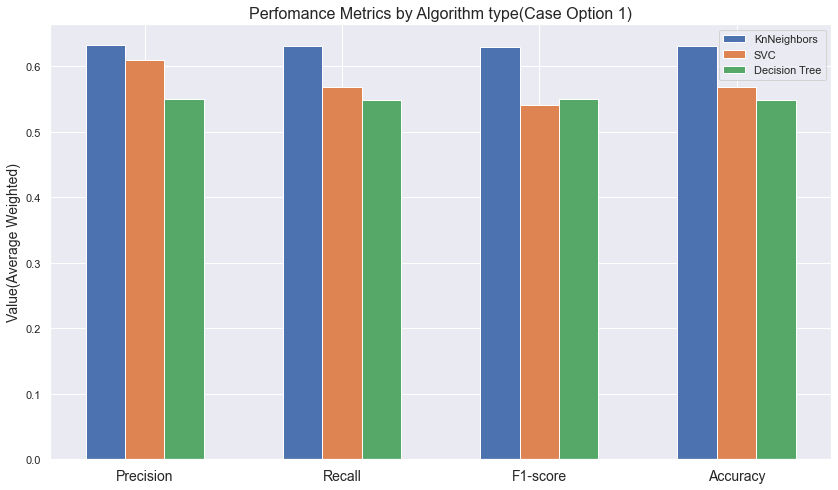

In [97]:
labels=['Precision','Recall','F1-score','Accuracy']

x = np.arange(len(labels))  
width = 0.2 
fig, ax= plt.subplots(figsize=(14,8))

knn_bar=ax.bar(x-width,knn_prf,width,label='KnNeighbors')
svc_bar=ax.bar(x,svc_prf,width,label="SVC")
dtree_bar=ax.bar(x+width,dtree_prf,width, label='Decision Tree')
ax.set_title('Perfomance Metrics by Algorithm type(Case Option 1)',fontsize=16)
ax.set_ylabel('Value(Average Weighted)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
ax.legend()
#fig.tight_layout()




### In the second part of our research we'll add "pH" and "Temp (k)" features to the Amino Acid Composition columns we used in the first part to predict the type of enzyme.

In [98]:
features_add=['pH','Temp (K)','A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V']
X_add= data_pdb_search[features_add].copy()

In [99]:
X_add.head(3)

,pH,Temp (K),A,R,N,D,C,Q,E,G,...,L,K,M,F,P,S,T,W,Y,V
0,7.0,294.0,0.037736,0.037736,0.056604,0.056604,0.018868,0.044025,0.050314,0.053459,...,0.088050,0.075472,0.025157,0.044025,0.069182,0.075472,0.050314,0.025157,0.056604,0.050314
1,6.5,285.0,0.076503,0.068306,0.038251,0.051913,0.010929,0.043716,0.079235,0.068306,...,0.117486,0.032787,0.040984,0.038251,0.054645,0.062842,0.049180,0.002732,0.019126,0.084699
2,8.0,289.0,0.100529,0.031746,0.058201,0.058201,0.010582,0.037037,0.047619,0.042328,...,0.068783,0.084656,0.047619,0.052910,0.047619,0.063492,0.052910,0.015873,0.047619,0.063492


In [100]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_add, y, test_size=0.33, random_state=543)

In [101]:
print(len(X_train2))
print(len(X_test2))
print(len(y_train2))
print(len(y_test2))

15163
7469
15163
7469


In [102]:
y_test2.value_counts()

Type_Encode
0              2608
5              2030
4              1565
3               607
1               352
2               307
dtype: int64

### Lets scale the features using Standard Scaler

In [103]:
X_train2_std = StandardScaler().fit_transform(X_train2)
X_test2_std= StandardScaler().fit_transform(X_test2)

In [104]:
X_train2_std

array([[-1.47002618e+00,  1.04898454e+00, -7.46137211e-01, ...,
         5.22825715e-01,  4.84570372e-02,  4.68622317e-01],
       [-2.65245035e-01,  5.98395373e-01,  3.99563775e-01, ...,
         9.50170621e-02, -1.57352847e+00,  1.02771105e+00],
       [-6.66838750e-01, -2.10513964e+00,  7.43130753e-01, ...,
        -1.09575485e-01, -3.08997212e-01,  1.74898252e+00],
       ...,
       [-2.11257613e+00,  4.48198983e-01,  3.07689000e+00, ...,
        -1.82424267e-01, -1.44049357e+00, -1.33005136e+00],
       [-1.87161990e+00,  2.98002593e-01, -7.35202186e-01, ...,
        -5.50610890e-01, -3.77808607e-01,  9.50642799e-01],
       [ 5.37942397e-01, -2.39018590e-03,  4.46003610e-01, ...,
        -6.63830506e-01, -5.64270322e-01,  3.14053439e-01]])

### Lets implement Decision Tree algorithm

In [105]:
dtree_class_2= DecisionTreeClassifier(max_leaf_nodes=3000, random_state=0)
dtree_class_2.fit(X_train2_std,y_train2)

DecisionTreeClassifier(max_leaf_nodes=3000, random_state=0)

In [106]:
dtree_predictions_2 = dtree_class_2.predict(X_test2_std)

In [107]:
dtree_accuracy_2 = accuracy_score(y_test2,dtree_predictions_2)

In [108]:
dtree_accuracy_2

0.5449189985272459

In [109]:
dtree_conmat_2= confusion_matrix(y_test2, dtree_predictions_2)

In [110]:
print(dtree_conmat_2)

[[1710   81   65  121  271  360]
 [  84  120   13   19   43   73]
 [  90   19   79   15   43   61]
 [ 127   43   24  228   81  104]
 [ 293   66   49   80  835  242]
 [ 401   84   87  122  238 1098]]


In [111]:
dtree_cr_2 = classification_report(y_test2, dtree_predictions_2)

In [112]:
print(dtree_cr_2)

              precision    recall  f1-score   support

           0       0.63      0.66      0.64      2608
           1       0.29      0.34      0.31       352
           2       0.25      0.26      0.25       307
           3       0.39      0.38      0.38       607
           4       0.55      0.53      0.54      1565
           5       0.57      0.54      0.55      2030

    accuracy                           0.54      7469
   macro avg       0.45      0.45      0.45      7469
weighted avg       0.55      0.54      0.55      7469



In [113]:
l_dt_2=precision_recall_fscore_support(y_test2, dtree_predictions_2, average='weighted')

In [114]:
l_dt_2

(0.5461244477276285, 0.5449189985272459, 0.5452229293839294, None)

In [115]:
l_dt_lst_2=list(l_dt_2)

In [116]:
l_dt_lst_2

[0.5461244477276285, 0.5449189985272459, 0.5452229293839294, None]

In [117]:
dtree_prf_2 = list(filter(None,l_dt_lst_2))

In [118]:
dtree_prf_2.append(dtree_accuracy_2)

In [119]:
dtree_prf_2

[0.5461244477276285,
 0.5449189985272459,
 0.5452229293839294,
 0.5449189985272459]

### Lets implement KNN algorithm

In [120]:
knn_class_2= KNeighborsClassifier(n_neighbors=3).fit(X_train2_std, np.ravel(y_train2))

In [121]:
#Lets make predictions
knn_predictions_2= knn_class_2.predict(X_test2_std)

In [122]:
knn_accuracy_2=knn_class_2.score(X_test2_std,y_test2)
print(knn_accuracy_2)

0.6153434194671308


In [123]:
knn_conmat_2=confusion_matrix(y_test2,knn_predictions_2)

In [124]:
print(knn_conmat_2)

[[1967   54   56   80  176  275]
 [  82  161   11   23   37   38]
 [  77   12  111   12   29   66]
 [ 138   35   39  270   55   70]
 [ 271   60   59   52  953  170]
 [ 476   55   67   93  205 1134]]


In [125]:
knn_cr_2 = classification_report(y_test2, knn_predictions_2)

In [126]:
print(knn_cr_2)

              precision    recall  f1-score   support

           0       0.65      0.75      0.70      2608
           1       0.43      0.46      0.44       352
           2       0.32      0.36      0.34       307
           3       0.51      0.44      0.47       607
           4       0.65      0.61      0.63      1565
           5       0.65      0.56      0.60      2030

    accuracy                           0.62      7469
   macro avg       0.54      0.53      0.53      7469
weighted avg       0.62      0.62      0.61      7469



In [127]:
l_knn_2=precision_recall_fscore_support(y_test2, knn_predictions_2, average='weighted')

In [128]:
l_knn_2

(0.6159952411964108, 0.6153434194671308, 0.613105760373658, None)

In [129]:
l_knn_lst_2=list(l_knn_2)

In [130]:
knn_prf_2 = list(filter(None,l_knn_lst_2))

In [131]:
knn_prf_2.append(knn_accuracy_2)

In [132]:
knn_prf_2

[0.6159952411964108, 0.6153434194671308, 0.613105760373658, 0.6153434194671308]

### Lets implement SVC algorithm

In [133]:
svc_class_2=SVC(kernel='rbf',gamma='scale').fit(X_train2_std,np.ravel(y_train2))

In [134]:
#lets make predictions
svc_predictions_2=svc_class_2.predict(X_test2_std)

In [135]:
svc_accuracy_2=svc_class_2.score(X_test2_std,y_test2)
print(svc_accuracy_2)

0.5646003481055027


In [136]:
svc_conmat_2= confusion_matrix(y_test2,svc_predictions_2)

In [137]:
print(svc_conmat_2)

[[1893    1    0    2  226  486]
 [ 115   60    0    4   58  115]
 [  92    0   22    0   48  145]
 [ 169    1    0   76  147  214]
 [ 332    0    0    2  908  323]
 [ 501    2    2    8  259 1258]]


In [138]:
svc_cr_2 = classification_report(y_test2, svc_predictions_2)

In [139]:
print(svc_cr_2)

              precision    recall  f1-score   support

           0       0.61      0.73      0.66      2608
           1       0.94      0.17      0.29       352
           2       0.92      0.07      0.13       307
           3       0.83      0.13      0.22       607
           4       0.55      0.58      0.57      1565
           5       0.50      0.62      0.55      2030

    accuracy                           0.56      7469
   macro avg       0.72      0.38      0.40      7469
weighted avg       0.61      0.56      0.54      7469



In [140]:
l_svc_2=precision_recall_fscore_support(y_test2, svc_predictions_2, average='weighted')

In [141]:
l_svc_lst_2=list(l_svc_2)

In [142]:
svc_prf_2=list(filter(None,l_svc_lst_2))

In [143]:
svc_prf_2.append(svc_accuracy_2)

In [144]:
svc_prf_2

[0.6122262872121971,
 0.5646003481055027,
 0.5363543601941825,
 0.5646003481055027]

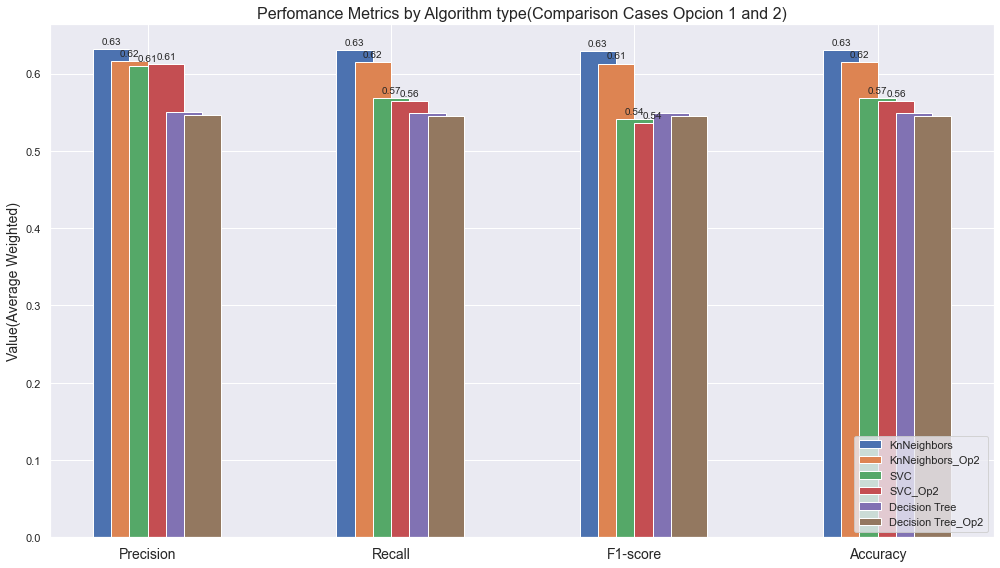

In [145]:
labels=['Precision','Recall','F1-score','Accuracy']

x = np.arange(len(labels))  
width = 0.15 
fig, ax= plt.subplots(figsize=(14,8))

knn_bar=ax.bar(x-width,knn_prf,width,label='KnNeighbors')
knn_bar_2=ax.bar(x-width/2,knn_prf_2,width,label='KnNeighbors_Op2')
svc_bar=ax.bar(x,svc_prf,width,label="SVC")
svc_bar_2=ax.bar(x+width/2,svc_prf_2,width,label="SVC_Op2")
dtree_bar=ax.bar(x+width,dtree_prf,width, label='Decision Tree')
dtree_bar_2=ax.bar(x+width+width/2,dtree_prf_2,width, label='Decision Tree_Op2')
ax.set_title('Perfomance Metrics by Algorithm type(Comparison Cases Opcion 1 and 2)',fontsize=16)
ax.set_ylabel('Value(Average Weighted)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
ax.legend(loc="lower right")
fig.tight_layout()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(knn_bar)
autolabel(knn_bar_2)
autolabel(svc_bar)
autolabel(svc_bar_2)

>1, train: 0.348, test: 0.349
>2, train: 0.350, test: 0.352
>3, train: 0.376, test: 0.369
>4, train: 0.404, test: 0.398
>5, train: 0.425, test: 0.414
>6, train: 0.438, test: 0.420
>7, train: 0.469, test: 0.436
>8, train: 0.500, test: 0.451
>9, train: 0.534, test: 0.459
>10, train: 0.571, test: 0.468
>11, train: 0.621, test: 0.482
>12, train: 0.666, test: 0.492
>13, train: 0.710, test: 0.501
>14, train: 0.755, test: 0.507
>15, train: 0.797, test: 0.520
>16, train: 0.834, test: 0.526
>17, train: 0.866, test: 0.530
>18, train: 0.899, test: 0.544
>19, train: 0.925, test: 0.546
>20, train: 0.947, test: 0.549
>21, train: 0.964, test: 0.553
>22, train: 0.975, test: 0.551
>23, train: 0.983, test: 0.553
>24, train: 0.989, test: 0.554
>25, train: 0.994, test: 0.551
>26, train: 0.996, test: 0.556
>27, train: 0.998, test: 0.555
>28, train: 0.999, test: 0.551
>29, train: 0.999, test: 0.552


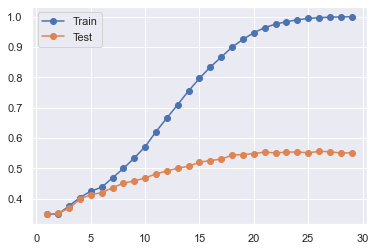

In [146]:
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 30)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train_std, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train_std)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test_std)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [147]:
def disp_conmat(conmat):
    columns = ['HYDROLASE','ISOMERASE','LIGASE','LYASE','OXYDOREDUCTASE','TRANSFERASE']  
    index =['HYDROLASE','ISOMERASE','LIGASE','LYASE','OXYDOREDUCTASE','TRANSFERASE']
    df_conmat = pd.DataFrame(conmat,columns,index)                      
#    plt.figure(figsize=(14,6))
#   df_conmat.index.name='Actual'
    sns.heatmap(df_conmat, annot=True,cmap="YlGnBu",fmt='',ax=ax)
    ax.set_xlabel('Predicted Class',fontsize=16)
    ax.set_ylabel('Actual Class', fontsize=16)

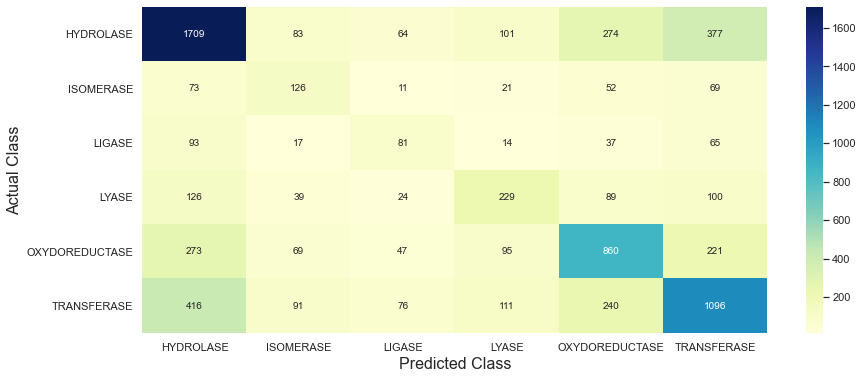

In [148]:
fig, ax=plt.subplots(figsize=(14,6))
disp_conmat(dtree_conmat)


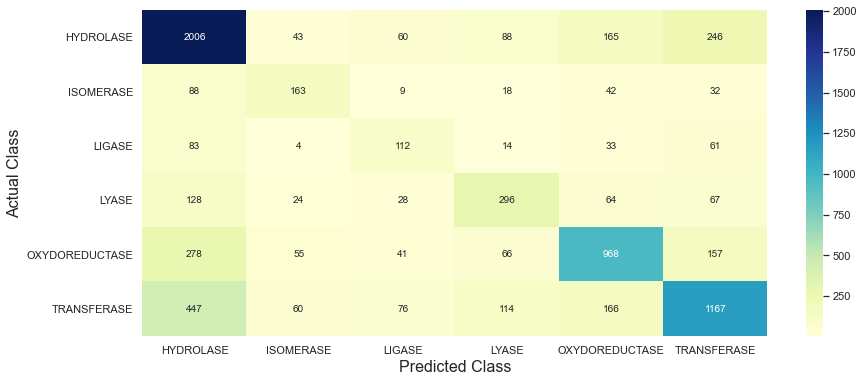

In [149]:
fig, ax=plt.subplots(figsize=(14,6))
disp_conmat(knn_conmat)

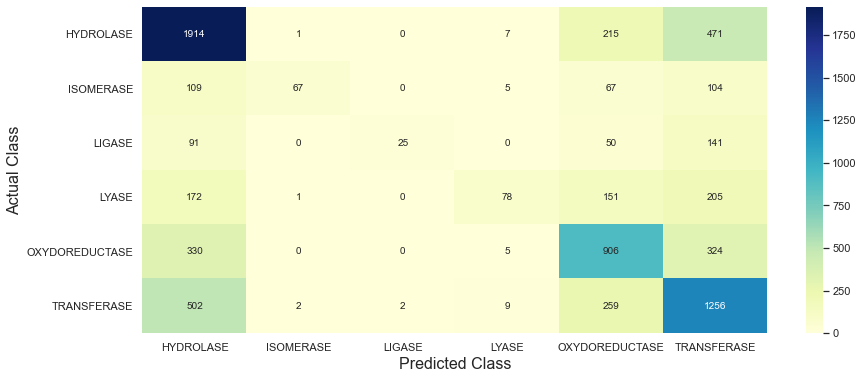

In [150]:
fig, ax=plt.subplots(figsize=(14,6))
disp_conmat(svc_conmat)


### lets use SMOTE

In [151]:
len(X_train)

15163

In [152]:
len(y_train)

15163

In [153]:
y_train.value_counts()

Type_Encode
0              5284
5              3997
4              3208
3              1226
1               799
2               649
dtype: int64

In [154]:
X_train_smt, y_train_smt=SMOTE().fit_resample(X_train_std,y_train)

In [155]:
y_train_smt.value_counts()

Type_Encode
5              5284
4              5284
3              5284
2              5284
1              5284
0              5284
dtype: int64

In [156]:
dtree_class_smt= DecisionTreeClassifier(max_leaf_nodes=3000, random_state=0)
#enzyme_tree_classifier= DecisionTreeClassifier()
dtree_class_smt.fit(X_train_smt,y_train_smt)

DecisionTreeClassifier(max_leaf_nodes=3000, random_state=0)

### Lets make a prediction using our Test set

In [157]:
dtree_predictions_smt = dtree_class_smt.predict(X_test_std)

In [158]:
np.unique(dtree_predictions)

array([0, 1, 2, 3, 4, 5])

In [159]:
dtree_accuracy_smt=accuracy_score(y_test,dtree_predictions_smt)
print(dtree_accuracy_smt)

0.5138572767438747


In [160]:
dtree_conmat_smt= confusion_matrix(y_test, dtree_predictions_smt)

In [161]:
print(dtree_conmat_smt)

[[1556  121  139  185  244  363]
 [  64  153   27   21   38   49]
 [  46   23  111   29   38   60]
 [  99   54   33  247   92   82]
 [ 217  126   81  145  801  195]
 [ 370  134  169  172  215  970]]


In [162]:
print(dtree_conmat)

[[1709   83   64  101  274  377]
 [  73  126   11   21   52   69]
 [  93   17   81   14   37   65]
 [ 126   39   24  229   89  100]
 [ 273   69   47   95  860  221]
 [ 416   91   76  111  240 1096]]


In [163]:
dtree_cr_smt = classification_report(y_test, dtree_predictions_smt)

In [164]:
print(dtree_cr)

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      2608
           1       0.30      0.36      0.32       352
           2       0.27      0.26      0.27       307
           3       0.40      0.38      0.39       607
           4       0.55      0.55      0.55      1565
           5       0.57      0.54      0.55      2030

    accuracy                           0.55      7469
   macro avg       0.45      0.46      0.45      7469
weighted avg       0.55      0.55      0.55      7469



In [165]:
print(dtree_cr_smt)

              precision    recall  f1-score   support

           0       0.66      0.60      0.63      2608
           1       0.25      0.43      0.32       352
           2       0.20      0.36      0.26       307
           3       0.31      0.41      0.35       607
           4       0.56      0.51      0.54      1565
           5       0.56      0.48      0.52      2030

    accuracy                           0.51      7469
   macro avg       0.42      0.46      0.43      7469
weighted avg       0.55      0.51      0.53      7469



### As the classifictation report is a text format, Lest use the funtion precision_recall_fscore to put its value in a list.

In [166]:
l_dt_smt=precision_recall_fscore_support(y_test, dtree_predictions_smt, average='weighted')

In [167]:
l_dt_smt

(0.5469728701159969, 0.5138572767438747, 0.5259299442069287, None)

In [168]:
l_dt_lst_smt=list(l_dt_smt)

In [169]:
l_dt_lst_smt

[0.5469728701159969, 0.5138572767438747, 0.5259299442069287, None]

In [170]:
dtree_prf_smt = list(filter(None,l_dt_lst_smt))

In [171]:
dtree_prf_smt.append(dtree_accuracy_smt)

In [172]:
dtree_prf_smt

[0.5469728701159969,
 0.5138572767438747,
 0.5259299442069287,
 0.5138572767438747]

### lets graph classification report by type of enzyme for Decision tree Option 1

In [173]:
def enz_type_per(dftest1):
    labels_per=['Precision','Recall','F1-score']
    x = np.arange(len(labels_per))  
    width = 0.15 
    hyd=ax.bar(x-2*width,dftest1.loc['HYDROLASE'][:3].values,width,label=dftest1.index[0])
    oxy=ax.bar(x-width,dftest1.loc['OXYDOREDUCTASE'][:3].values,width,label=dftest1.index[4])
    tra=ax.bar(x,dftest1.loc['TRANSFERASE'][:3].values,width,label=dftest1.index[5])
    lya=ax.bar(x+width,dftest1.loc['LYASE'][:3].values,width,label=dftest1.index[3])
    iso=ax.bar(x+2*width,dftest1.loc['ISOMERASE'][:3].values,width,label=dftest1.index[1])
    lig=ax.bar(x+3*width,dftest1.loc['LIGASE'][:3].values,width,label=dftest1.index[2])
    ax.set_ylabel('Value (Decimal)', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(labels_per, fontsize=14)
    ax.legend(loc="lower right")
    fig.tight_layout()
    autolabel(hyd)
    autolabel(iso)
    autolabel(lig)
    autolabel(lya)
    autolabel(oxy)
    autolabel(tra)
    

In [174]:
tar_names = ['HYDROLASE','ISOMERASE','LIGASE','LYASE','OXYDOREDUCTASE','TRANSFERASE']
dtree_cr_smt_dict = classification_report(y_test, dtree_predictions_smt,output_dict=True,target_names=tar_names)

In [175]:
df_dtree_cr_smt=pd.DataFrame.from_dict(dtree_cr_smt_dict)

In [176]:
df_dtree_cr_smt=df_dtree_cr_smt.T

In [177]:
df_dtree_cr_smt

,precision,recall,f1-score,support
HYDROLASE,0.661565,0.596626,0.627419,2608.000000
ISOMERASE,0.250409,0.434659,0.317757,352.000000
LIGASE,0.198214,0.361564,0.256055,307.000000
LYASE,0.309136,0.406919,0.351351,607.000000
OXYDOREDUCTASE,0.560924,0.511821,0.535249,1565.000000
TRANSFERASE,0.564282,0.477833,0.517471,2030.000000
accuracy,0.513857,0.513857,0.513857,0.513857
macro avg,0.424088,0.464904,0.434217,7469.000000
weighted avg,0.546973,0.513857,0.525930,7469.000000


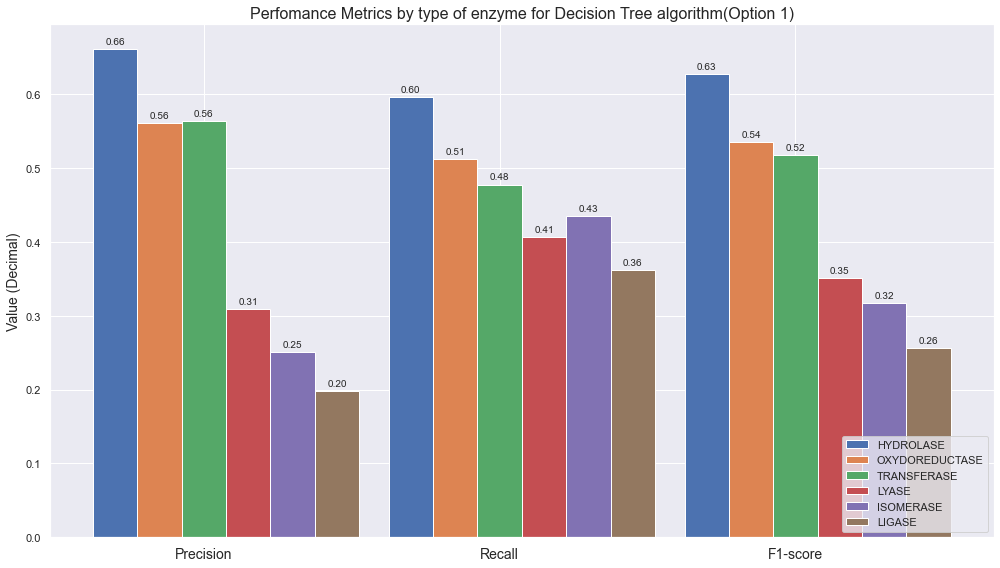

In [178]:
fig, ax= plt.subplots(figsize=(14,8))
ax.set_title('Perfomance Metrics by type of enzyme for Decision Tree algorithm(Option 1)',fontsize=16)
enz_type_per(df_dtree_cr_smt)

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree algorithm-Option 1 (Number of predictions)')

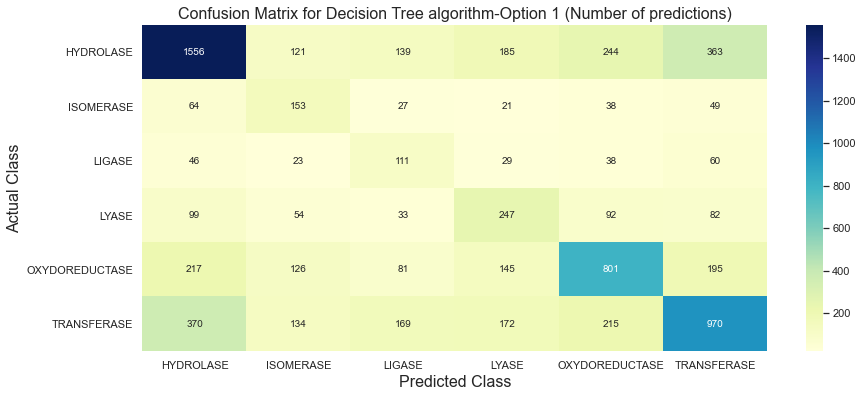

In [179]:
fig, ax=plt.subplots(figsize=(14,6))
disp_conmat(dtree_conmat_smt)
ax.set_title('Confusion Matrix for Decision Tree algorithm-Option 1 (Number of predictions)',fontsize=16)

### Lets create and train our KNN MODEL


In [180]:
knn_class_smt= KNeighborsClassifier(n_neighbors=3).fit(X_train_smt, np.ravel(y_train_smt))

In [181]:
#Lets make predictions
knn_predictions_smt= knn_class_smt.predict(X_test_std)

In [182]:
knn_accuracy_smt=knn_class_smt.score(X_test_std,y_test)
print(knn_accuracy)

0.6308742803588164


In [183]:
#lets create a confussion matrix
knn_conmat_smt=confusion_matrix(y_test,knn_predictions_smt)

In [184]:
print(knn_conmat)

[[2006   43   60   88  165  246]
 [  88  163    9   18   42   32]
 [  83    4  112   14   33   61]
 [ 128   24   28  296   64   67]
 [ 278   55   41   66  968  157]
 [ 447   60   76  114  166 1167]]


In [185]:
print(knn_conmat_smt)

[[1712  136  183  173  199  205]
 [  27  222   18   40   27   18]
 [  27   13  185   22   25   35]
 [  43   36   46  395   55   32]
 [ 122   96   93  115 1031  108]
 [ 218  134  194  187  166 1131]]


In [186]:
knn_cr_smt= classification_report(y_test, knn_predictions_smt)

In [187]:
print(knn_cr)

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      2608
           1       0.47      0.46      0.47       352
           2       0.34      0.36      0.35       307
           3       0.50      0.49      0.49       607
           4       0.67      0.62      0.64      1565
           5       0.67      0.57      0.62      2030

    accuracy                           0.63      7469
   macro avg       0.55      0.55      0.55      7469
weighted avg       0.63      0.63      0.63      7469



In [188]:
print(knn_cr_smt)

              precision    recall  f1-score   support

           0       0.80      0.66      0.72      2608
           1       0.35      0.63      0.45       352
           2       0.26      0.60      0.36       307
           3       0.42      0.65      0.51       607
           4       0.69      0.66      0.67      1565
           5       0.74      0.56      0.64      2030

    accuracy                           0.63      7469
   macro avg       0.54      0.63      0.56      7469
weighted avg       0.68      0.63      0.64      7469



In [189]:
l_knn_smt=precision_recall_fscore_support(y_test, knn_predictions_smt, average='weighted')

In [190]:
l_knn_smt

(0.6843896542979612, 0.6260543580131209, 0.6425972507471109, None)

In [191]:
l_knn_lst_smt=list(l_knn_smt)

In [192]:
knn_prf_smt = list(filter(None,l_knn_lst_smt))

In [193]:
knn_prf_smt.append(knn_accuracy_smt)

In [194]:
knn_prf

[0.6320543619669385,
 0.6308742803588164,
 0.6287246262500799,
 0.6308742803588164]

In [195]:
knn_prf_smt

[0.6843896542979612,
 0.6260543580131209,
 0.6425972507471109,
 0.6260543580131209]

### lets graph classification report by type of enzyme for knn Option 1

In [196]:
knn_cr_smt_dict = classification_report(y_test, knn_predictions_smt,output_dict=True,target_names=tar_names)

In [197]:
df_knn_cr_smt=pd.DataFrame.from_dict(knn_cr_smt_dict)

In [198]:
df_knn_cr_smt=df_knn_cr_smt.T

In [199]:
df_knn_cr_smt

,precision,recall,f1-score,support
HYDROLASE,0.796650,0.656442,0.719781,2608.000000
ISOMERASE,0.348509,0.630682,0.448938,352.000000
LIGASE,0.257302,0.602606,0.360624,307.000000
LYASE,0.423820,0.650741,0.513320,607.000000
OXYDOREDUCTASE,0.685961,0.658786,0.672099,1565.000000
TRANSFERASE,0.739699,0.557143,0.635572,2030.000000
accuracy,0.626054,0.626054,0.626054,0.626054
macro avg,0.541990,0.626067,0.558389,7469.000000
weighted avg,0.684390,0.626054,0.642597,7469.000000


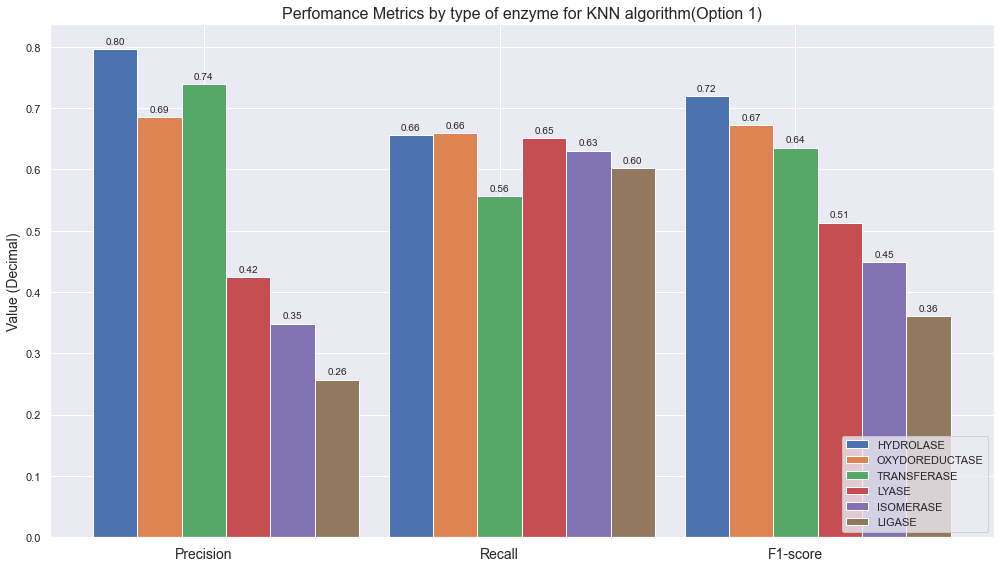

In [200]:
fig, ax= plt.subplots(figsize=(14,8))
ax.set_title('Perfomance Metrics by type of enzyme for KNN algorithm(Option 1)',fontsize=16)
enz_type_per(df_knn_cr_smt)

Text(0.5, 1.0, 'Confusion Matrix for kNN algorithm-Option 1 (Number of predictions)')

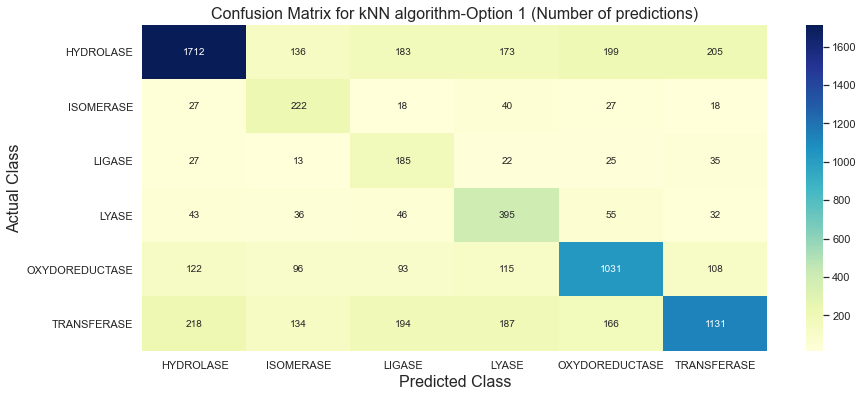

In [201]:
fig, ax=plt.subplots(figsize=(14,6))
disp_conmat(knn_conmat_smt)
ax.set_title('Confusion Matrix for kNN algorithm-Option 1 (Number of predictions)',fontsize=16)

### Lets create and train our svc model

In [202]:
svc_class_smt=SVC(kernel='rbf',gamma='scale').fit(X_train_smt,np.ravel(y_train_smt))

In [203]:
#lets make predictions
svc_predictions_smt=svc_class_smt.predict(X_test_std)

In [204]:
#Lets check accuracy
svc_accuracy_smt=svc_class_smt.score(X_test_std,y_test)
print(svc_accuracy_smt)

0.569821930646673


In [205]:
#lets create a confussion matrix
svc_conmat_smt= confusion_matrix(y_test,svc_predictions_smt)

In [206]:
print(svc_conmat)

[[1914    1    0    7  215  471]
 [ 109   67    0    5   67  104]
 [  91    0   25    0   50  141]
 [ 172    1    0   78  151  205]
 [ 330    0    0    5  906  324]
 [ 502    2    2    9  259 1256]]


In [207]:
print(svc_conmat_smt)

[[1680  121  153  153  174  327]
 [  49  190   21   32   21   39]
 [  51   18  157   21   18   42]
 [  78   51   29  328   44   77]
 [ 167  125   66  162  880  165]
 [ 309  119  137  243  201 1021]]


In [208]:
svc_cr_smt = classification_report(y_test, svc_predictions_smt)

In [209]:
print(svc_cr)

              precision    recall  f1-score   support

           0       0.61      0.73      0.67      2608
           1       0.94      0.19      0.32       352
           2       0.93      0.08      0.15       307
           3       0.75      0.13      0.22       607
           4       0.55      0.58      0.56      1565
           5       0.50      0.62      0.55      2030

    accuracy                           0.57      7469
   macro avg       0.71      0.39      0.41      7469
weighted avg       0.61      0.57      0.54      7469



In [210]:
print(svc_cr_smt)

              precision    recall  f1-score   support

           0       0.72      0.64      0.68      2608
           1       0.30      0.54      0.39       352
           2       0.28      0.51      0.36       307
           3       0.35      0.54      0.42       607
           4       0.66      0.56      0.61      1565
           5       0.61      0.50      0.55      2030

    accuracy                           0.57      7469
   macro avg       0.49      0.55      0.50      7469
weighted avg       0.61      0.57      0.58      7469



In [211]:
l_svc_smt=precision_recall_fscore_support(y_test, svc_predictions_smt, average='weighted')

In [212]:
l_svc_lst_smt=list(l_svc_smt)

In [213]:
svc_prf_smt=list(filter(None,l_svc_lst_smt))

In [214]:
svc_prf_smt.append(svc_accuracy_smt)

In [215]:
svc_prf

[0.6095121924349718,
 0.5684830633284241,
 0.5411978262888862,
 0.5684830633284241]

In [216]:
svc_prf_smt

[0.6094115021871103, 0.569821930646673, 0.5820602623521599, 0.569821930646673]

In [217]:
svc_cr_smt_dict = classification_report(y_test, svc_predictions_smt,output_dict=True,target_names=tar_names)

In [218]:
df_svc_cr_smt=pd.DataFrame.from_dict(svc_cr_smt_dict)

In [219]:
df_svc_cr_smt=df_svc_cr_smt.T

In [220]:
df_svc_cr_smt

,precision,recall,f1-score,support
HYDROLASE,0.719794,0.644172,0.679887,2608.000000
ISOMERASE,0.304487,0.539773,0.389344,352.000000
LIGASE,0.278863,0.511401,0.360920,307.000000
LYASE,0.349308,0.540362,0.424321,607.000000
OXYDOREDUCTASE,0.657698,0.562300,0.606269,1565.000000
TRANSFERASE,0.611011,0.502956,0.551743,2030.000000
accuracy,0.569822,0.569822,0.569822,0.569822
macro avg,0.486860,0.550161,0.502081,7469.000000
weighted avg,0.609412,0.569822,0.582060,7469.000000


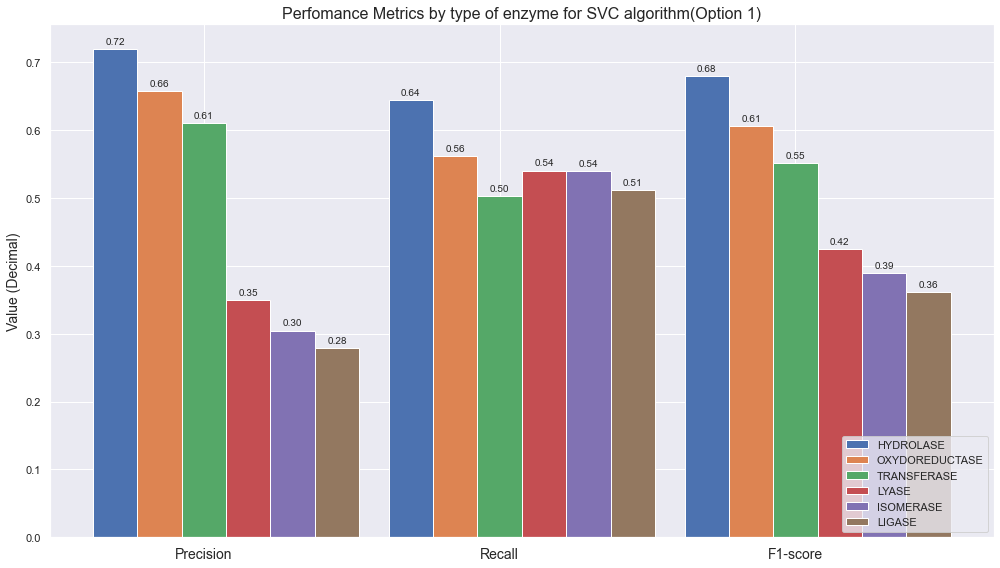

In [221]:
fig, ax= plt.subplots(figsize=(14,8))
ax.set_title('Perfomance Metrics by type of enzyme for SVC algorithm(Option 1)',fontsize=16)
enz_type_per(df_svc_cr_smt)

Text(0.5, 1.0, 'Confusion Matrix for SVC algorithm-Option 1 (Number of predictions)')

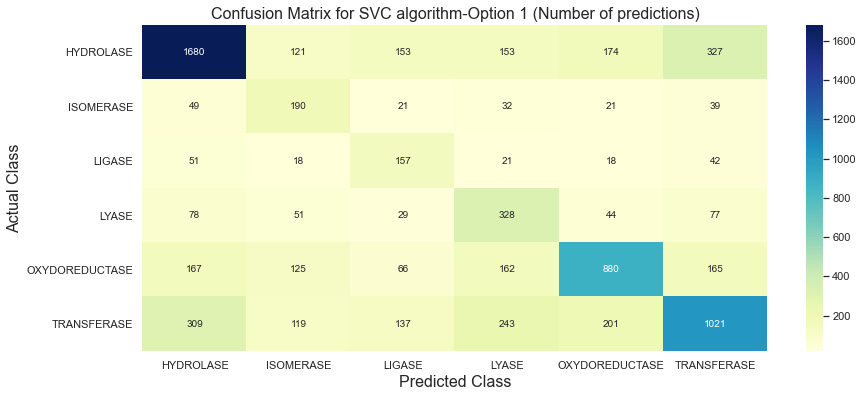

In [222]:
fig, ax=plt.subplots(figsize=(14,6))
disp_conmat(svc_conmat_smt)
ax.set_title('Confusion Matrix for SVC algorithm-Option 1 (Number of predictions)',fontsize=16)

Lets plot results

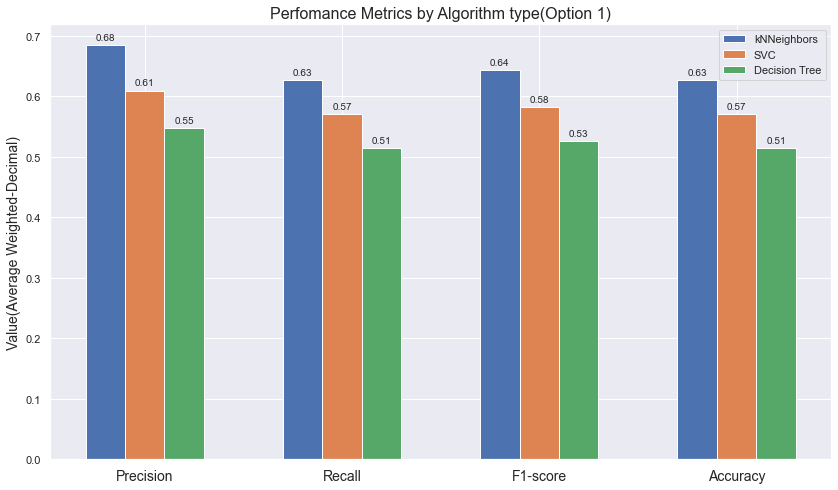

In [223]:
labels=['Precision','Recall','F1-score','Accuracy']

x = np.arange(len(labels))  
width = 0.2 
fig, ax= plt.subplots(figsize=(14,8))

knn_bar_smt=ax.bar(x-width,knn_prf_smt,width,label='kNNeighbors')
svc_bar_smt=ax.bar(x,svc_prf_smt,width,label="SVC")
dtree_bar_smt=ax.bar(x+width,dtree_prf_smt,width, label='Decision Tree')
ax.set_title('Perfomance Metrics by Algorithm type(Option 1)',fontsize=16)
ax.set_ylabel('Value(Average Weighted-Decimal)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
ax.legend()
#fig.tight_layout()


autolabel(knn_bar_smt)
autolabel(svc_bar_smt)
autolabel(dtree_bar_smt)

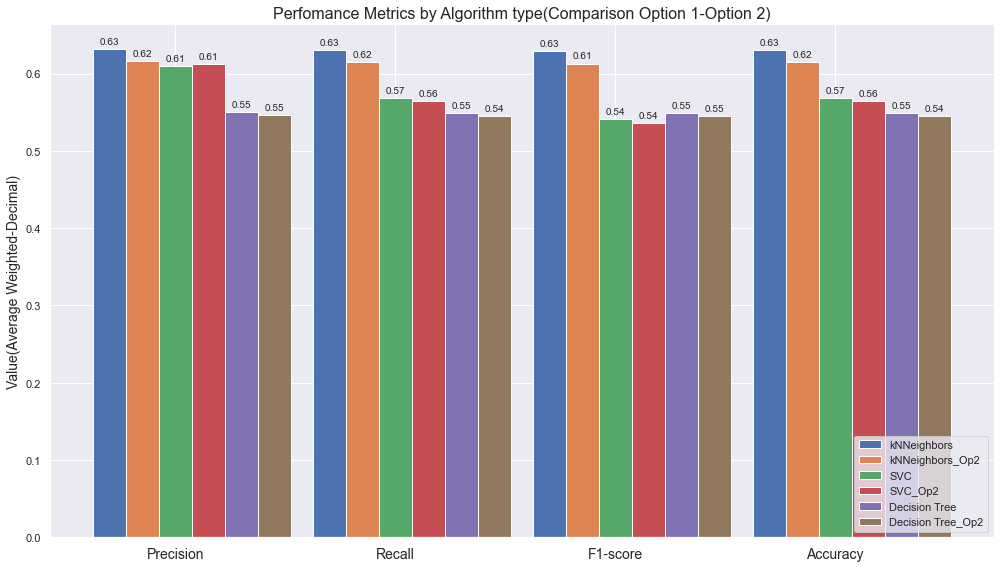

In [224]:
labels=['Precision','Recall','F1-score','Accuracy']

x = np.arange(len(labels))  
width = 0.15 
fig, ax= plt.subplots(figsize=(14,8))

knn_bar=ax.bar(x-2*width,knn_prf,width,label='kNNeighbors')
knn_bar_2=ax.bar(x-width,knn_prf_2,width,label='kNNeighbors_Op2')
svc_bar=ax.bar(x,svc_prf,width,label="SVC")
svc_bar_2=ax.bar(x+width,svc_prf_2,width,label="SVC_Op2")
dtree_bar=ax.bar(x+2*width,dtree_prf,width, label='Decision Tree')
dtree_bar_2=ax.bar(x+3*width,dtree_prf_2,width, label='Decision Tree_Op2')
ax.set_title('Perfomance Metrics by Algorithm type(Comparison Option 1-Option 2)',fontsize=16)
ax.set_ylabel('Value(Average Weighted-Decimal)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
ax.legend(loc="lower right")
fig.tight_layout()
autolabel(knn_bar)
autolabel(knn_bar_2)
autolabel(svc_bar)
autolabel(svc_bar_2)
autolabel(dtree_bar)
autolabel(dtree_bar_2)

### LETS TEST OPTION 2 WITH SMOTE

In [225]:
len(X_train2)

15163

In [226]:
len(y_train2)

15163

In [227]:
y_train2.value_counts()

Type_Encode
0              5284
5              3997
4              3208
3              1226
1               799
2               649
dtype: int64

In [228]:
X_train2_smt, y_train2_smt=SMOTE().fit_resample(X_train2_std,y_train2)

In [229]:
y_train2_smt.value_counts()

Type_Encode
5              5284
4              5284
3              5284
2              5284
1              5284
0              5284
dtype: int64

### Lets implement Decision Tree algorithm

In [230]:
dtree_class_2_smt= DecisionTreeClassifier(max_leaf_nodes=3000, random_state=0)
dtree_class_2_smt.fit(X_train2_smt,y_train2_smt)

DecisionTreeClassifier(max_leaf_nodes=3000, random_state=0)

In [231]:
dtree_predictions_2_smt = dtree_class_2_smt.predict(X_test2_std)

In [232]:
dtree_accuracy_2_smt = accuracy_score(y_test2,dtree_predictions_2_smt)

In [233]:
dtree_accuracy_2_smt

0.503815771857009

In [234]:
dtree_conmat_2_smt= confusion_matrix(y_test2, dtree_predictions_2_smt)

In [235]:
print(dtree_conmat_2)

[[1710   81   65  121  271  360]
 [  84  120   13   19   43   73]
 [  90   19   79   15   43   61]
 [ 127   43   24  228   81  104]
 [ 293   66   49   80  835  242]
 [ 401   84   87  122  238 1098]]


In [236]:
print(dtree_conmat_2_smt)

[[1506  132  178  207  280  305]
 [  57  150   19   36   42   48]
 [  61   19  121   24   30   52]
 [  89   48   37  244   96   93]
 [ 246  131   91  111  799  187]
 [ 347  157  163  172  248  943]]


In [237]:
dtree_cr_2_smt = classification_report(y_test2, dtree_predictions_2_smt)

In [238]:
print(dtree_cr_2)

              precision    recall  f1-score   support

           0       0.63      0.66      0.64      2608
           1       0.29      0.34      0.31       352
           2       0.25      0.26      0.25       307
           3       0.39      0.38      0.38       607
           4       0.55      0.53      0.54      1565
           5       0.57      0.54      0.55      2030

    accuracy                           0.54      7469
   macro avg       0.45      0.45      0.45      7469
weighted avg       0.55      0.54      0.55      7469



In [239]:
print(dtree_cr_2_smt)

              precision    recall  f1-score   support

           0       0.65      0.58      0.61      2608
           1       0.24      0.43      0.30       352
           2       0.20      0.39      0.26       307
           3       0.31      0.40      0.35       607
           4       0.53      0.51      0.52      1565
           5       0.58      0.46      0.52      2030

    accuracy                           0.50      7469
   macro avg       0.42      0.46      0.43      7469
weighted avg       0.54      0.50      0.52      7469



In [240]:
l_dt_2_smt=precision_recall_fscore_support(y_test2, dtree_predictions_2_smt, average='weighted')

In [241]:
l_dt_2_smt

(0.5416942396305645, 0.503815771857009, 0.517040767534922, None)

In [242]:
l_dt_lst_2_smt=list(l_dt_2_smt)

In [243]:
l_dt_lst_2_smt

[0.5416942396305645, 0.503815771857009, 0.517040767534922, None]

In [244]:
dtree_prf_2_smt = list(filter(None,l_dt_lst_2_smt))

In [245]:
dtree_prf_2_smt.append(dtree_accuracy_2_smt)

In [246]:
dtree_prf_2

[0.5461244477276285,
 0.5449189985272459,
 0.5452229293839294,
 0.5449189985272459]

In [247]:
dtree_prf_2_smt

[0.5416942396305645, 0.503815771857009, 0.517040767534922, 0.503815771857009]

### Lets implement KNN algorithm

In [248]:
knn_class_2_smt= KNeighborsClassifier(n_neighbors=3).fit(X_train2_smt, np.ravel(y_train2_smt))

In [249]:
#Lets make predictions
knn_predictions_2_smt= knn_class_2_smt.predict(X_test2_std)

In [250]:
knn_accuracy_2_smt=knn_class_2_smt.score(X_test2_std,y_test2)
print(knn_accuracy_2_smt)

0.5927165617887268


In [251]:
knn_conmat_2_smt=confusion_matrix(y_test2,knn_predictions_2_smt)

In [252]:
print(knn_conmat_2)

[[1967   54   56   80  176  275]
 [  82  161   11   23   37   38]
 [  77   12  111   12   29   66]
 [ 138   35   39  270   55   70]
 [ 271   60   59   52  953  170]
 [ 476   55   67   93  205 1134]]


In [253]:
print(knn_conmat_2_smt)

[[1637  160  173  219  193  226]
 [  33  205   23   33   26   32]
 [  30   17  174   28   25   33]
 [  51   47   53  371   43   42]
 [ 130  113  114  109  971  128]
 [ 226  155  216  176  188 1069]]


In [254]:
knn_cr_2_smt = classification_report(y_test2, knn_predictions_2_smt)

In [255]:
print(knn_cr_2)

              precision    recall  f1-score   support

           0       0.65      0.75      0.70      2608
           1       0.43      0.46      0.44       352
           2       0.32      0.36      0.34       307
           3       0.51      0.44      0.47       607
           4       0.65      0.61      0.63      1565
           5       0.65      0.56      0.60      2030

    accuracy                           0.62      7469
   macro avg       0.54      0.53      0.53      7469
weighted avg       0.62      0.62      0.61      7469



In [256]:
print(knn_cr_2_smt)

              precision    recall  f1-score   support

           0       0.78      0.63      0.69      2608
           1       0.29      0.58      0.39       352
           2       0.23      0.57      0.33       307
           3       0.40      0.61      0.48       607
           4       0.67      0.62      0.64      1565
           5       0.70      0.53      0.60      2030

    accuracy                           0.59      7469
   macro avg       0.51      0.59      0.52      7469
weighted avg       0.66      0.59      0.61      7469



In [257]:
l_knn_2_smt=precision_recall_fscore_support(y_test2, knn_predictions_2_smt, average='weighted')

In [258]:
l_knn_2_smt

(0.6574594317185084, 0.5927165617887268, 0.6118249440531821, None)

In [259]:
l_knn_lst_2_smt=list(l_knn_2_smt)

In [260]:
knn_prf_2_smt = list(filter(None,l_knn_lst_2_smt))

In [261]:
knn_prf_2_smt.append(knn_accuracy_2_smt)

In [262]:
knn_prf_2_smt

[0.6574594317185084,
 0.5927165617887268,
 0.6118249440531821,
 0.5927165617887268]

### Lets implement SVC algorithm

In [263]:
svc_class_2_smt=SVC(kernel='rbf',gamma='scale').fit(X_train2_smt,np.ravel(y_train2_smt))

In [264]:
#lets make predictions
svc_predictions_2_smt=svc_class_2_smt.predict(X_test2_std)

In [265]:
svc_accuracy_2_smt=svc_class_2_smt.score(X_test2_std,y_test2)
print(svc_accuracy_2_smt)

0.5682152898647744


In [266]:
svc_conmat_2_smt= confusion_matrix(y_test2,svc_predictions_2_smt)

In [267]:
print(svc_conmat_2)

[[1893    1    0    2  226  486]
 [ 115   60    0    4   58  115]
 [  92    0   22    0   48  145]
 [ 169    1    0   76  147  214]
 [ 332    0    0    2  908  323]
 [ 501    2    2    8  259 1258]]


In [268]:
print(svc_conmat_2_smt)

[[1680  105  119  149  186  369]
 [  49  184   15   33   28   43]
 [  52   20  148   15   22   50]
 [  79   49   28  321   47   83]
 [ 192  110   63  146  888  166]
 [ 355  106  132  221  193 1023]]


In [269]:
svc_cr_2_smt = classification_report(y_test2, svc_predictions_2_smt)

In [270]:
print(svc_cr_2)

              precision    recall  f1-score   support

           0       0.61      0.73      0.66      2608
           1       0.94      0.17      0.29       352
           2       0.92      0.07      0.13       307
           3       0.83      0.13      0.22       607
           4       0.55      0.58      0.57      1565
           5       0.50      0.62      0.55      2030

    accuracy                           0.56      7469
   macro avg       0.72      0.38      0.40      7469
weighted avg       0.61      0.56      0.54      7469



In [271]:
print(svc_cr_2_smt)

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      2608
           1       0.32      0.52      0.40       352
           2       0.29      0.48      0.36       307
           3       0.36      0.53      0.43       607
           4       0.65      0.57      0.61      1565
           5       0.59      0.50      0.54      2030

    accuracy                           0.57      7469
   macro avg       0.49      0.54      0.50      7469
weighted avg       0.60      0.57      0.58      7469



In [272]:
l_svc_2_smt=precision_recall_fscore_support(y_test2, svc_predictions_2_smt, average='weighted')

In [273]:
l_svc_lst_2_smt=list(l_svc_2_smt)

In [274]:
svc_prf_2_smt=list(filter(None,l_svc_lst_2_smt))

In [275]:
svc_prf_2_smt.append(svc_accuracy_2_smt)

In [276]:
svc_prf_2

[0.6122262872121971,
 0.5646003481055027,
 0.5363543601941825,
 0.5646003481055027]

In [277]:
svc_prf_2_smt

[0.5971015526942615,
 0.5682152898647744,
 0.5774144715938335,
 0.5682152898647744]

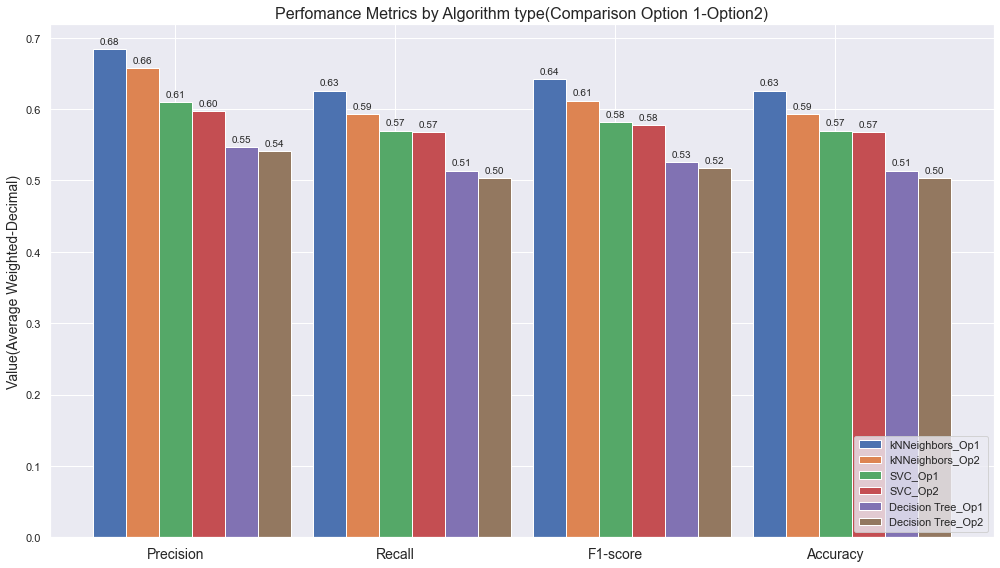

In [278]:
labels=['Precision','Recall','F1-score','Accuracy']

x = np.arange(len(labels))  
width = 0.15 
fig, ax= plt.subplots(figsize=(14,8))

knn_bar_smt=ax.bar(x-2*width,knn_prf_smt,width,label='kNNeighbors_Op1')
knn_bar_2_smt=ax.bar(x-width,knn_prf_2_smt,width,label='kNNeighbors_Op2')
svc_bar_smt=ax.bar(x,svc_prf_smt,width,label="SVC_Op1")
svc_bar_2_smt=ax.bar(x+width,svc_prf_2_smt,width,label="SVC_Op2")
dtree_bar_smt=ax.bar(x+2*width,dtree_prf_smt,width, label='Decision Tree_Op1')
dtree_bar_2_smt=ax.bar(x+3*width,dtree_prf_2_smt,width, label='Decision Tree_Op2')
ax.set_title('Perfomance Metrics by Algorithm type(Comparison Option 1-Option2)',fontsize=16)
ax.set_ylabel('Value(Average Weighted-Decimal)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
ax.legend(loc="lower right")
fig.tight_layout()
autolabel(knn_bar_smt)
autolabel(knn_bar_2_smt)
autolabel(svc_bar_smt)
autolabel(svc_bar_2_smt)
autolabel(dtree_bar_smt)
autolabel(dtree_bar_2_smt)

In [279]:
### lets graph classification report by type of enzyme for SVC Option 2

In [280]:
tar_names = ['HYDROLASE','ISOMERASE','LIGASE','LYASE','OXYDOREDUCTASE','TRANSFERASE']
svc_cr_2_smt_dict = classification_report(y_test2, svc_predictions_2_smt,output_dict=True,target_names=tar_names)

In [281]:
df_svc_cr2smt=pd.DataFrame.from_dict(svc_cr_2_smt_dict)

In [282]:
df_svc_cr2smt=df_svc_cr2smt.T

In [283]:
df_svc_cr2smt

,precision,recall,f1-score,support
HYDROLASE,0.697964,0.644172,0.669990,2608.000000
ISOMERASE,0.320557,0.522727,0.397408,352.000000
LIGASE,0.293069,0.482085,0.364532,307.000000
LYASE,0.362712,0.528830,0.430295,607.000000
OXYDOREDUCTASE,0.651026,0.567412,0.606350,1565.000000
TRANSFERASE,0.589965,0.503941,0.543571,2030.000000
accuracy,0.568215,0.568215,0.568215,0.568215
macro avg,0.485882,0.541528,0.502024,7469.000000
weighted avg,0.597102,0.568215,0.577414,7469.000000


In [284]:
def enz_type_per(dftest1):
    labels=['Precision','Recall','F1-score']
    x = np.arange(len(labels))  
    width = 0.15 
    hyd=ax.bar(x-2*width,dftest1.loc['HYDROLASE'][:3].values,width,label=dftest1.index[0])
    oxy=ax.bar(x-width,dftest1.loc['OXYDOREDUCTASE'][:3].values,width,label=dftest1.index[4])
    tra=ax.bar(x,dftest1.loc['TRANSFERASE'][:3].values,width,label=dftest1.index[5])
    lya=ax.bar(x+width,dftest1.loc['LYASE'][:3].values,width,label=dftest1.index[3])
    iso=ax.bar(x+2*width,dftest1.loc['ISOMERASE'][:3].values,width,label=dftest1.index[1])
    lig=ax.bar(x+3*width,dftest1.loc['LIGASE'][:3].values,width,label=dftest1.index[2])
    ax.set_ylabel('Value', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=14)
    ax.legend(loc="lower right")
    fig.tight_layout()
    autolabel(hyd)
    autolabel(iso)
    autolabel(lig)
    autolabel(lya)
    autolabel(oxy)
    autolabel(tra)
    

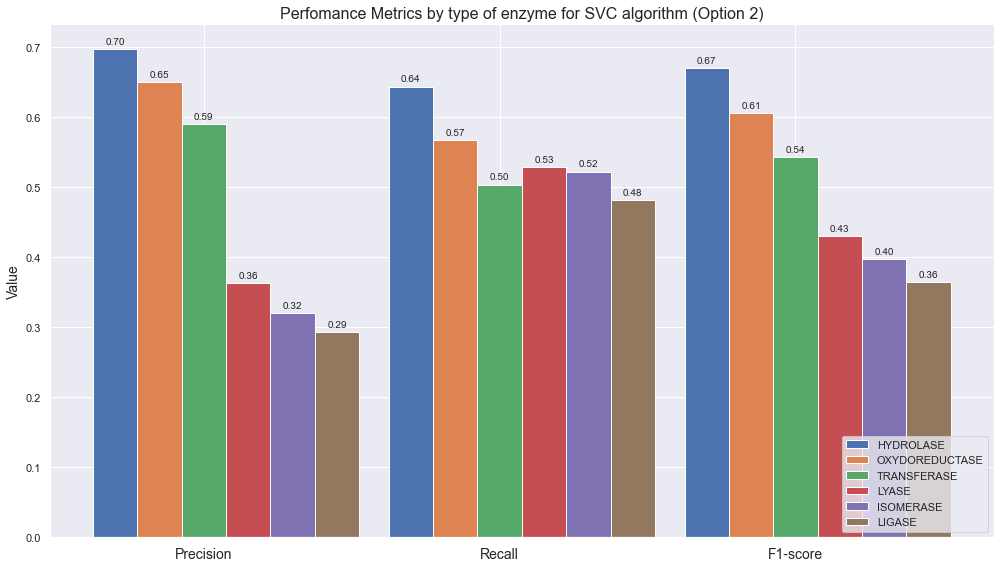

In [285]:
fig, ax= plt.subplots(figsize=(14,8))
ax.set_title('Perfomance Metrics by type of enzyme for SVC algorithm (Option 2)',fontsize=16)
enz_type_per(df_svc_cr2smt)